In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import random
import datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import linear_model 
from sklearn import cross_validation 
from sklearn import metrics 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

C:\Users\konya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#2007 flight data for training
flights_07 = pd.read_csv('C:/Users/konya/Desktop/IDS_Project/Project-progress/2007/2007.csv', sep=',')
print(flights_07.shape)

#2008 fight data for testing
flights_08 = pd.read_csv('C:/Users/konya/Desktop/IDS_Project/Project-progress/2008/2008.csv', sep=',')
print(flights_08.shape)



(7453215, 29)
(7009728, 29)


In [3]:
flights_07.rename(columns={'Year' : 'year', 'Month':'month','DayofMonth': 'day','DayOfWeek': 'dow','UniqueCarrier': 'Carrier'}, inplace=True)

In [4]:
flights_08.rename(columns={'Year' : 'year', 'Month':'month','DayofMonth': 'day','DayOfWeek': 'dow','UniqueCarrier': 'Carrier'}, inplace=True)

In [5]:
flights_07.head(10)

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,N611SW,83.0,90.0,74.0,3.0,10.0,SMF,PDX,479,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,N482,101.0,110.0,89.0,47.0,56.0,SMF,PHX,647,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,N749SW,99.0,110.0,86.0,-2.0,9.0,SMF,PHX,647,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,N451,102.0,105.0,90.0,44.0,47.0,SMF,PHX,647,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,N630WN,105.0,115.0,92.0,-7.0,3.0,SMF,PHX,647,5,8,0,NaN,0,0,0,0,0,0


In [6]:
flights_08.head(10)

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,N428WN,233.0,250.0,219.0,-18.0,-1.0,IND,LAS,1591,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,N689SW,95.0,95.0,70.0,2.0,2.0,IND,MCI,451,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,79.0,95.0,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#DATA CLEANING 

#since most if the below cols have NaN values or 0.0 we are considering them not useful and dropping them
#removal of unecessary cols
ignorable_columns = ['FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                     'LateAircraftDelay']
flights_07.drop(ignorable_columns, axis = 1, inplace = True)
flights_08.drop(ignorable_columns, axis = 1, inplace = True)

In [ ]:
#club Year , Month, Day fields into a date time
flights_07['DATE'] = pd.to_datetime(flights_07[['year','month', 'day']])
flights_08['DATE'] = pd.to_datetime(flights_07[['year','month', 'day']])

In [17]:
flights_07.head(5)

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,DATE
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,2007-01-01
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,2007-01-01
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,2007-01-01
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,2007-01-01
4,2007,1,1,1,831.0,830,957.0,1000,WN,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,2007-01-01


In [24]:
#we are considering a flight is delayed only if the dealy is more that 25 min (boolean col "DELAYED" True/False)
flights_07['Delayed'] = flights_07['DepDelay'].apply(lambda x: x>=25)
print("total flights: " + str(flights_07.shape[0]))
print("total delays: " + str(flights_07['Delayed'].sum()))
flights_07['Delayed'][:5]

#DateFrame to hold flights delayed more than 25 mins
flights_07 = flights_07[flights_07['Delayed'] == True]

total flights: 7453215
total delays: 1132899


In [79]:
#we are considering a flight is delayed only if the dealy is more that 25 min (boolean col "DELAYED" True/False)
flights_08['Delayed'] = flights_08['DepDelay'].apply(lambda x: x>=25)
print("total flights: " + str(flights_08.shape[0]))
print("total delays: " + str(flights_08['Delayed'].sum()))
flights_08['Delayed'][:5]

#DateFrame to hold flights delayed more than 25 mins
flights_08 = flights_08[flights_08['Delayed'] == True]

total flights: 7009728
total delays: 963354


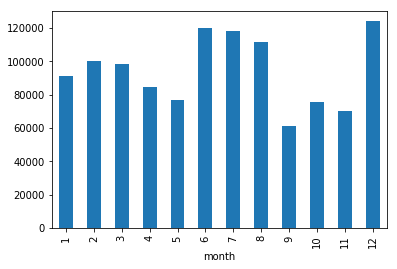

In [25]:
#visulaization
# Compute average number of flights per month
#departure delay has some positive and negative values so taking mean will balance the size so take count instead
month_delay = flights_07[['DepDelay', 'month']].groupby('month').size()
month_delay.plot.bar()

In [8]:
#to get hour from each flight delay dep time
def get_hour_from_int(val):
    if pd.isnull(val):
        return np.nan
    else:
        #if the val is 2400 set it to next day 00:00
        if val == 2400: 
            val = 0
        val = "{0:04d}".format(int(val))
        h = int(val[0:2])
        m =  int(val[2:4])
        hour = datetime.time(h,m)
        return hour

In [35]:
flights_07['Scheduled_Dep'] = flights_07['CRSDepTime'].apply(get_hour_from_int)

In [80]:
flights_08['Scheduled_Dep'] = flights_08['CRSDepTime'].apply(get_hour_from_int)

In [48]:
flights_07.head(2)

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,DATE,Delayed,Scheduled_Dep
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,2007-01-01,True,21:30:00
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,2007-01-01,True,12:00:00


In [42]:
#now to combine date and Scheduled_Dep to form date time

#this takes date and time array and returns the combined datetime
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
    
def create_flight_datetime(date, dep):       
    if pd.isnull(dep):
        return np.nan
    elif dep == 2400:
        date += datetime.timedelta(days=1)
        dep = datetime.time(0,0)
        cols = [date,dep]
        return combine_date_time(cols)
    else:
        dep = get_hour_from_int(dep)
        cols = [date,dep]
        return combine_date_time(cols)

In [43]:
#test of methods
print(create_flight_datetime(datetime.datetime.strptime('2007-03-19', "%Y-%m-%d"),0))
print(create_flight_datetime(datetime.datetime.strptime('2007-03-19', "%Y-%m-%d"),None))
print(create_flight_datetime(datetime.datetime.strptime('2007-03-19', "%Y-%m-%d"),2400))

2007-03-19 00:00:00
nan
2007-03-20 00:00:00


In [51]:
flights_07['DATE_TIME'] = flights_07.apply(lambda row: create_flight_datetime(row['DATE'], row['CRSDepTime']), axis=1)

In [81]:
#no need to execue this as we wont use date time field in model - it is only for visulaization
flights_08['DATE_TIME'] = flights_08.apply(lambda row: create_flight_datetime(row['DATE'], row['CRSDepTime']), axis=1)

In [53]:
#date_time clubbing done
flights_07.head(2)

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,DATE,Delayed,Scheduled_Dep,DATE_TIME
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,2007-01-01,True,21:30:00,2007-01-01 21:30:00
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,2007-01-01,True,12:00:00,2007-01-01 12:00:00


In [55]:
#get statistics of all flights of all airlines with their average delay
def airlines_stats(air_group):
    return {'count': air_group.count(), 'min': air_group.min(), 'max': air_group.max(), 'mean': air_group.mean()}

stats = flights_07['DepDelay'].groupby(flights_07['Carrier']).apply(airlines_stats).unstack()
stats = stats.sort_values('count')
print(stats)

            count     max       mean   min
Carrier                                   
HA         1345.0  1317.0  90.672862  25.0
AQ         2045.0   624.0  60.967237  25.0
F9        10938.0   887.0  59.847961  25.0
AS        25717.0   819.0  69.099001  25.0
9E        30701.0  1956.0  81.624247  25.0
B6        34101.0  1048.0  84.720331  25.0
FL        34860.0   869.0  69.761733  25.0
OH        39921.0   966.0  69.586784  25.0
YV        47808.0   696.0  79.744206  25.0
CO        50213.0   908.0  77.450959  25.0
DL        53213.0   815.0  68.995058  25.0
NW        53984.0  2601.0  71.883206  25.0
XE        67715.0   927.0  81.078550  25.0
EV        68425.0  1002.0  75.218604  25.0
US        76943.0  1003.0  66.441678  25.0
OO        77119.0   737.0  70.092610  25.0
UA        86131.0  1360.0  77.752876  25.0
MQ        96264.0  1354.0  71.355418  25.0
AA       117785.0  1369.0  74.963849  25.0
WN       157671.0   672.0  60.561149  25.0


Text(0.5,1,'Total # of flights delayed per airline')

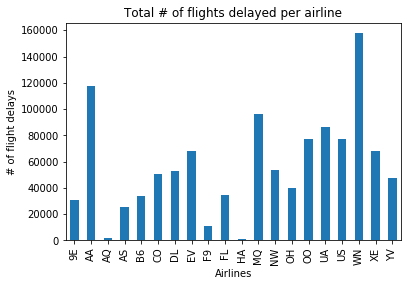

In [61]:
#number of flights delayed > 5min per each airline
airlines_group = flights_07[['DepDelay', 'Carrier']]
airlines_group_mean = airlines_group.groupby('Carrier').size()

ax = airlines_group_mean.plot(kind='bar')
ax.set_ylabel("# of flight delays")
ax.set_xlabel("Airlines")
ax.set_title("Total # of flights delayed per airline")

In [56]:
#plot number of flight delays for each hour
flights_07['HOUR'] = flights_07.DATE_TIME.apply(lambda x: x.hour)

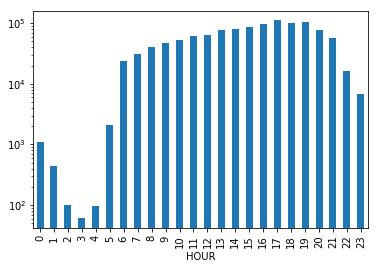

In [59]:
# Compute noumber of delayed flights by hour
hour_grouped = flights_07[['DepDelay', 'HOUR']].groupby('HOUR').size()

# plot average delays by hour of day
ax = hour_grouped.plot(kind='bar')
ax.set_yscale('log', nonposy='clip')

In [64]:
#Read aiports and airlines csv
airports = pd.read_csv("C:/Users/konya/Desktop/IDS_Project/Project-progress/airports.csv",sep=',')
airlines = pd.read_csv("C:/Users/konya/Desktop/IDS_Project/Project-progress/airlines-compact.csv",sep=',')

Text(0.5,1,'Mean delay at origin\n')

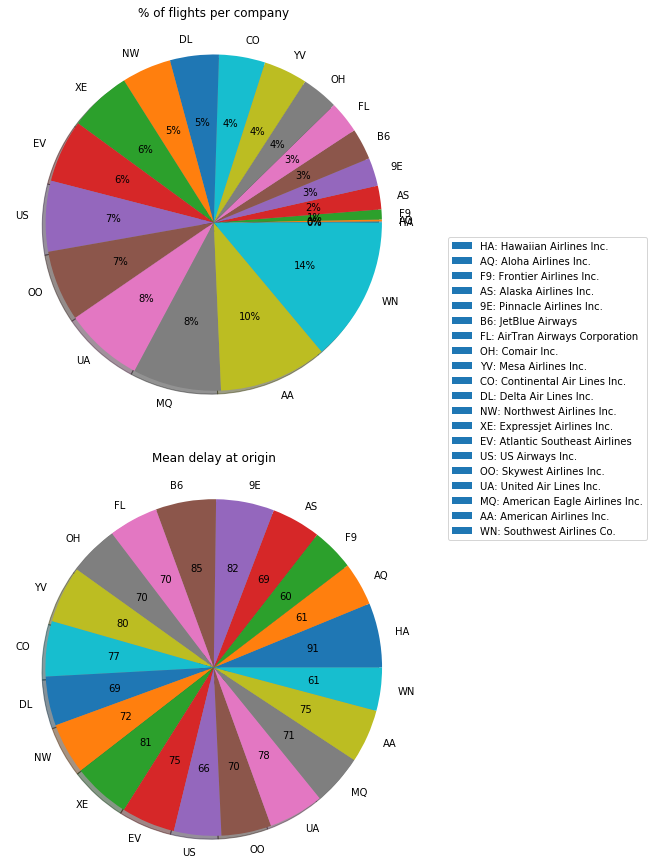

In [66]:
#though the number of flights delays are high for an airline for comparitive analyss we should comapre mean delay clubbed with 
#no of flights for each airline
#now trying to plot mean delay of each airline vs count of flight delays of each airline on pie charts
#so that we can do comparitive analysis of which airline is worst/best of all

# dictionary for Airlines code and name
airlines_dict = airlines.set_index('Code')['Description'].to_dict()

#total number of flights per airline
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

#figure for the pie chart
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[1,0]) 
#------------------------------
# Pie chart 1
labels = [s for s in  stats.index]
sizes  = stats['count'].values
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0, shadow=True)

ax1.axis('equal')
ax1.set_title('% of flights per company\n')

#this is the legend which gets the airline code from dict and gives the name of airline name
hanlr = []
for i in range(len(airlines_dict)):
    hanlr.append(mpatches.Patch(label = stats.index[i] + ': ' + airlines_dict[stats.index[i]]))

ax1.legend(handles=hanlr, bbox_to_anchor=(0.5, 0.7), bbox_transform=plt.gcf().transFigure)

# Pie chart 2
sizes  = stats['mean'].values
sizes  = [max(s,0) for s in sizes]

patches, texts, autotexts = ax2.pie(sizes,labels = labels, startangle=0, shadow=True, autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
ax2.axis('equal')
ax2.set_title('Mean delay at origin\n')
#savefig('foo.png')


In [74]:
#analysing the delay trends of a particular carrier flight from a particular airport
#get all B6 airlines flights from BOS sorted acc to dates
airline_flights = flights_07[(flights_07['Carrier'] == 'B6') & (flights_07['ArrDelay'] > 0)
                                  & (flights_07['Origin'] == 'BOS')].sort_values(by=['DATE_TIME'])
airline_flights.shape[0]
#only get last six months
airline_flights = airline_flights[airline_flights['DATE_TIME'] >= '2007-06-01']
airline_flights = airline_flights[(airline_flights['DepDelay']>=15) & (airline_flights['DepDelay']<=350)]
airline_flights[:5]

,year,month,day,dow,DepTime,CRSDepTime,ArrTime,CRSArrTime,Carrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,DATE,Delayed,Scheduled_Dep,DATE_TIME,HOUR
3636693,2007,6,1,5,1001.0,900,1132.0,1040,B6,91.0,100.0,70.0,52.0,61.0,BOS,IAD,413,2007-06-01,True,09:00:00,2007-06-01 09:00:00,9
3636699,2007,6,1,5,1213.0,1125,1316.0,1237,B6,63.0,72.0,39.0,39.0,48.0,BOS,JFK,187,2007-06-01,True,11:25:00,2007-06-01 11:25:00,11
3636715,2007,6,1,5,1419.0,1315,1725.0,1630,B6,186.0,195.0,171.0,55.0,64.0,BOS,PBI,1197,2007-06-01,True,13:15:00,2007-06-01 13:15:00,13
3636701,2007,6,1,5,2151.0,1650,2306.0,1807,B6,75.0,77.0,43.0,299.0,301.0,BOS,JFK,187,2007-06-01,True,16:50:00,2007-06-01 16:50:00,16
3636696,2007,6,1,5,2030.0,1835,2226.0,2019,B6,116.0,104.0,84.0,127.0,115.0,BOS,IAD,413,2007-06-01,True,18:35:00,2007-06-01 18:35:00,18


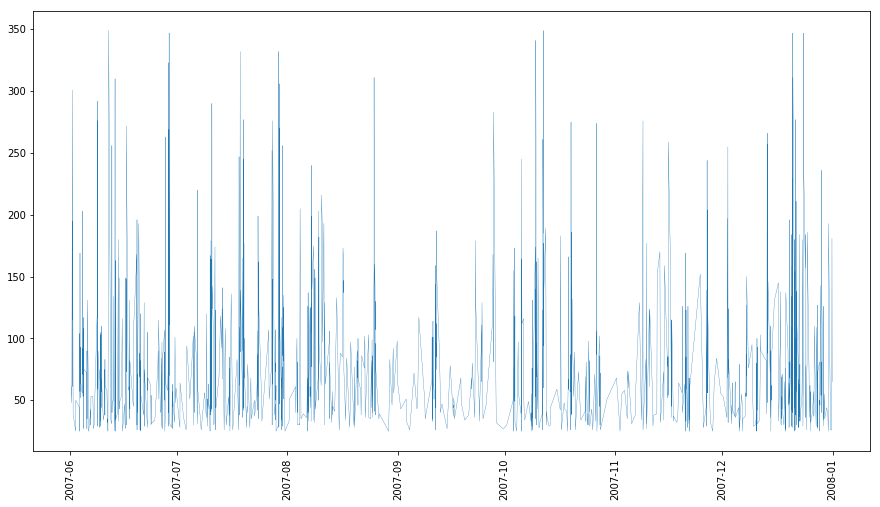

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

datestrings = airline_flights['DATE_TIME']
plt.figure(figsize=(15, 9))

plt_data = airline_flights['DepDelay']
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=90 )

ax=plt.gca()
plt.plot(datestrings,plt_data,linestyle='-', marker='',linewidth=0.3)
plt.show()

In [2]:
#Reading the complete files again to get both delays >=25 and <25 mins
#2007 flight data for training
new_flights_07 = pd.read_csv('C:/Users/konya/Desktop/IDS_Project/Project-progress/2007/2007.csv', sep=',')
print(new_flights_07.shape)

#2008 fight data for testing
new_flights_08 = pd.read_csv('C:/Users/konya/Desktop/IDS_Project/Project-progress/2008/2008.csv', sep=',')
print(new_flights_08.shape)



(7453215, 29)
(7009728, 29)


In [3]:
new_flights_07.rename(columns={'Year' : 'year', 'Month':'month','DayofMonth': 'day','DayOfWeek': 'dow','UniqueCarrier': 'Carrier'}, inplace=True)
new_flights_08.rename(columns={'Year' : 'year', 'Month':'month','DayofMonth': 'day','DayOfWeek': 'dow','UniqueCarrier': 'Carrier'}, inplace=True)

In [4]:
#since most if the below cols have NaN values or 0.0 we are considering them not useful and dropping them
#removal of unecessary cols
new_ignorable_columns = ['FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                     'LateAircraftDelay']
new_flights_07.drop(new_ignorable_columns, axis = 1, inplace = True)
new_flights_08.drop(new_ignorable_columns, axis = 1, inplace = True)

In [5]:
print(new_flights_07.head(2))
print(new_flights_08.head(2))

   year  month  day  dow  DepTime  CRSDepTime  ArrTime  CRSArrTime Carrier  \
0  2007      1    1    1   1232.0        1225   1341.0        1340      WN   
1  2007      1    1    1   1918.0        1905   2043.0        2035      WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  \
0               69.0            75.0     54.0       1.0       7.0    SMF  ONT   
1               85.0            90.0     74.0       8.0      13.0    SMF  PDX   

   Distance  
0       389  
1       479  
   year  month  day  dow  DepTime  CRSDepTime  ArrTime  CRSArrTime Carrier  \
0  2008      1    3    4   2003.0        1955   2211.0        2225      WN   
1  2008      1    3    4    754.0         735   1002.0        1000      WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay Origin Dest  \
0              128.0           150.0    116.0     -14.0       8.0    IAD  TPA   
1              128.0           145.0    113.0       2.0      19.0    IAD  TPA   



In [10]:
#convert deptime type to float from int
new_flights_07['CRSDepTime'] = new_flights_07['CRSDepTime'].astype(float)

#convert float value into HH:MM
new_flights_07['HOUR'] = new_flights_07['CRSDepTime'].apply(get_hour_from_int)

#extract HH from HH:MM
v = new_flights_07['HOUR'].astype('str').str.split(':')
new_flights_07['HOUR'] = v.apply(lambda x : x[0])


In [11]:
#same for test set
#convert deptime type to float from int
new_flights_08['CRSDepTime'] = new_flights_08['CRSDepTime'].astype(float)
#convert float value into HH:MM
new_flights_08['HOUR'] = new_flights_08['CRSDepTime'].apply(get_hour_from_int)
#extract HH from HH:MM
v = new_flights_08['HOUR'].astype('str').str.split(':')
new_flights_08['HOUR'] = v.apply(lambda x : x[0])

del v

In [13]:
#drop NaN values rows
new_flights_07 = new_flights_07.dropna()
new_flights_08 = new_flights_08.dropna()

In [14]:
# training set and test set
cols = ['month', 'day', 'dow', 'HOUR', 'Distance']

train_y = new_flights_07['DepDelay'] >= 25
train_x = new_flights_07[cols]
train_y_vals = new_flights_07['DepDelay']

test_y = new_flights_08['DepDelay'] >= 25
test_x = new_flights_08[cols]
test_y_vals = new_flights_08['DepDelay']

print(train_x.shape)
print(train_y.shape[0])
print(train_y_vals.shape[0])



(7275288, 5)
7275288
7275288


In [15]:
print(test_x.shape)
print(test_y.shape[0])
print(test_y_vals.shape[0])

(6855029, 5)
6855029
6855029


In [16]:
def precision_recall_fscore_acc_calc(tp,tn,fp,fn):
    arr=[]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1score = 2 * (precision * recall) / (precision + recall)
    acc = (tp + tn) / (tp + tn + fp + fn)
    print("Precision:" ,precision ,"\nRecall:" ,recall ,"\nF1 Score:" ,f1score ,"\nAccuracy:",acc)
    

In [17]:
# Linear Regression Model with L2 regularization
from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y_vals)

# Make predictions using the testing set
delay_preds = regr.predict(test_x)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y_vals, delay_preds))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y_vals, delay_preds))


Coefficients: 
 [-0.0836083   0.06601608  0.08461902  1.18293537  0.00118545]
Mean squared error: 1216.59
Variance score: 0.02


In [63]:
#adding day and month to genearate x-axis for graph
def form_date_month(x,y):
    return str(x)+"-"+str(y)

test_x['d'] = test_x.apply(lambda row: form_date_month(row['month'],row['day']), axis=1)

In [ ]:
# Plot outputs of last 100000 value preds
plt.figure(1, figsize=(17,10))
plt.scatter(test_x['d'].tail(100000), test_y_vals[-100000:],  color='black')
plt.plot(test_x['d'].tail(100000), delay_preds[-100000:], color='blue',linewidth=0.1)

plt.xticks(())
plt.yticks(())
plt.xlabel('Predicted values in blue')
plt.ylabel('Test labels scattered')
plt.show()

#plt.savefig('linear_last100000.png')

In [61]:
# logistic regression model with L2 regularization
clf_lr = linear_model.LogisticRegression(penalty='l2', class_weight='balanced')
clf_lr.fit(train_x, train_y)

# Predict output labels on test set
pr = clf_lr.predict(test_x)

# display evaluation metrics
cm = confusion_matrix(test_y, pr)
print("Confusion matrix")
print(pd.DataFrame(cm))
precision_recall_fscore_acc_calc(cm[0][0],cm[1][1],cm[1][0],cm[0][1])

Confusion matrix
         0        1
0  3489436  2407553
1   371175   586865
Precision: 0.903855892241 
Recall: 0.591731814321 
F1 Score: 0.715224235468 
Accuracy: 0.594643873863


In [18]:
# Create Random Forest classifier with 50 trees
clf_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)
clf_rf.fit(train_x, train_y)

# Evaluate on test set
pr_rf = clf_rf.predict(test_x)

# print results
cm_rf = confusion_matrix(test_y, pr_rf)
print("Confusion matrix")
print(pd.DataFrame(cm_rf))
precision_recall_fscore_acc_calc(cm_rf[0][0],cm_rf[1][1],cm_rf[1][0],cm_rf[0][1])


Confusion matrix
         0       1
0  5634651  262338
1   863704   94336
Precision: 0.867088824787 
Recall: 0.95551322887 
F1 Score: 0.909156050853 
Accuracy: 0.835734903528
